<h1 style="font-size:3rem;color:maroon;"> Predicting Air Pollution Level using Machine Learning</h1>

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting air pollution level in an area in Eindhoven in the upcoming week.

We're going to take the following approach:
1. Problem definition
2. Data
3. Features
4. Data Exploration & Visualization
5. Data Preparation
6. Modelling

<h2><font color=slateblue> 1. Problem Definition </font></h2>

In a statement,
> Given historical pollution data, weather data and people going through an area, can we predict air pollution level (fine particle matter level pm2.5) in an area in Eindhoven in the upcoming week?

<h2><font color=slateblue> 2. Data </font></h2>

The data is provided by TNO and Zicht op Data.

<h2><font color=slateblue> 3. Features </font></h2>

This is where you'll get different information about each of the features in our data.

We have three separate datasets for the period between 25-09-2021 and 30-12-2021:

**Air pollution**
* date: date in ymd_hms
* PC4: postcode
* pm2.5: particulate matter <2.5um in ug/m3
* pm10: particulate matter <10um in ug/m3
* no2: nitrogen dioxide in ug/m3
* no: nitrogen oxide in ug/m3
* so2: sulphur dioxide in ug/m3


**Meteo**
* date: date in ymd_hms
* PC4: postcode
* wd: wind direction in degrees 0-360
* ws: wind speed in m/s
* blh: boundary layer height in metres
* tcc: total cloud cover in oktas (0-9)
* ssrd: solar surface radiation downwards in W/m2 

(see https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels?tab=overview for more information)

**Zichtop**
* PC4: postcode
* date: date in ymd_hms
* pop_tot: total number of people in PC4 for each time step
* m00_30: number of people who have been there for up to 30 minutes
* m30_60: number of people who have been there for 30 and 60 minutes
* H1_2: number of people who have been there for 1 and 2 hours
* H2_4: number of people who have been there for 2 and 4 hours
* H4_8: number of people who have been there for 4 and 8 hours
* H8_16: number of people who have been there for 8 and 16 hours
* H16plus: number of people who have been there for over 16 hours

<h2><font color=slateblue> 4. Data Exploration & Visualization </font></h2>

<h4><font color=brown>Setup</font></h4>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date, timedelta
plt.style.use("ggplot")

<h4><font color=brown>Reading the dataset from the system</font></h4>

<h4><font color=brown>Getting the basic information about the dataset</font></h4>

In [2]:
df_ap_np = pd.read_csv('data/air_pollution.csv')
df_ap = pd.read_csv("data/air_pollution.csv", parse_dates=["date"])

df_ap_per_date_per_postalcode = df_ap.groupby([pd.Grouper(freq='D', key='date'),
                     'PC4']).mean()

<h4><font color=brown>Most pluted day per pollution type, per postal code(day mean)</font></h4>

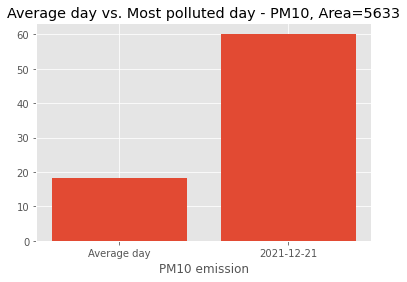

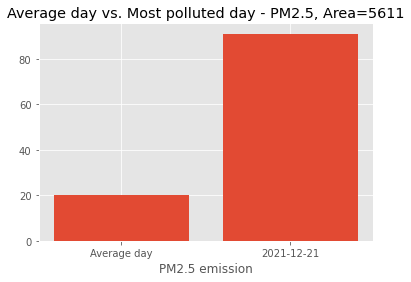

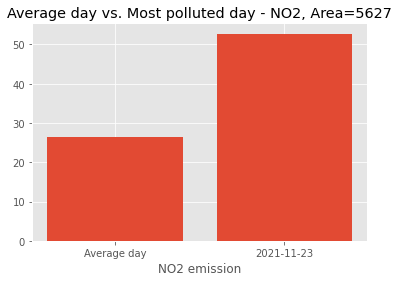

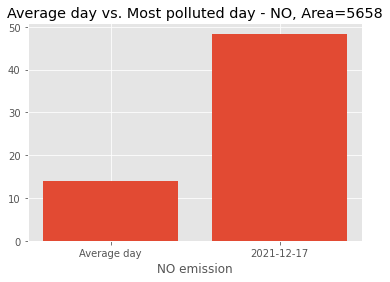

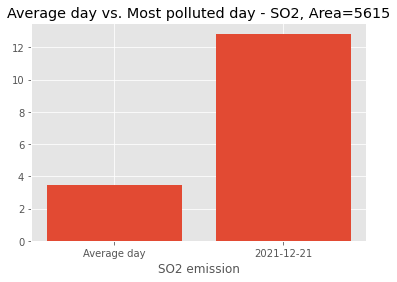

In [3]:
most_polluted_days = df_ap_per_date_per_postalcode.idxmax()

i = 0
for day in most_polluted_days:
    most_polluted_values = df_ap_per_date_per_postalcode.loc[(day[0] ,day[1]), :]
    all_for_postcode =  df_ap_per_date_per_postalcode.loc[(slice(None), day[1]), :]
    plt.bar(["Average day", str(day[0].date())], [all_for_postcode.mean()[most_polluted_days.index[i]], most_polluted_values.loc[most_polluted_days.index[i]]])
    plt.title("Average day vs. Most polluted day - " + str(most_polluted_days.index[i]).upper() + ", Area=" + str(day[1]) )
    plt.xlabel(str(most_polluted_days.index[i]).upper() + " emission")
    plt.show()
    i += 1

    
    

    

<h4><font color=brown>Least pluted day per pollution type, per postal code(day mean)</font></h4>

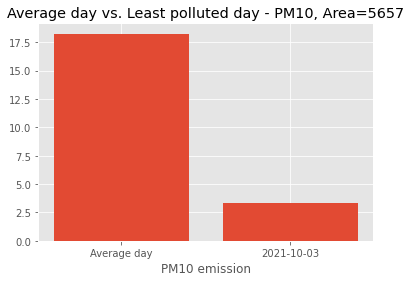

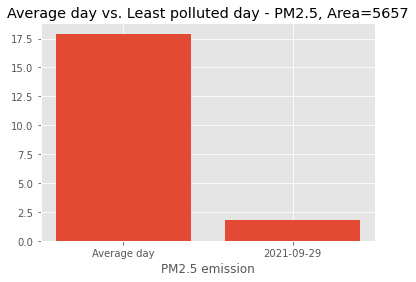

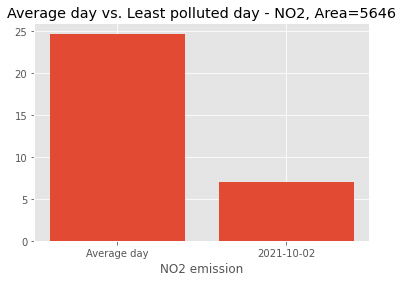

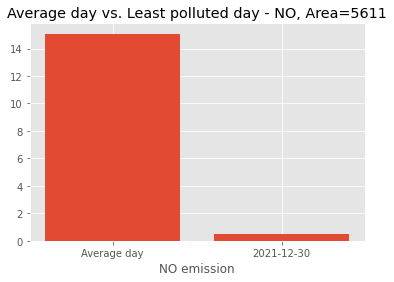

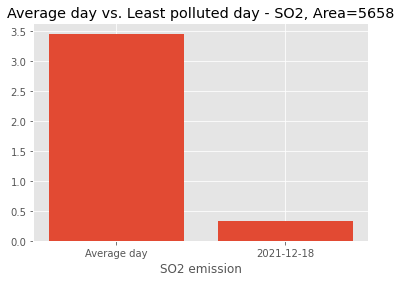

In [4]:
least_polluted_days = df_ap_per_date_per_postalcode.idxmin()

i = 0
for day in least_polluted_days:
    least_polluted_values = df_ap_per_date_per_postalcode.loc[(day[0] ,day[1]), :]
    all_for_postcode =  df_ap_per_date_per_postalcode.loc[(slice(None), day[1]), :]
    plt.bar(["Average day", str(day[0].date())], [all_for_postcode.mean()[least_polluted_days.index[i]], least_polluted_values.loc[least_polluted_days.index[i]]])
    plt.title("Average day vs. Least polluted day - " + str(least_polluted_days.index[i]).upper() + ", Area=" + str(day[1]) )
    plt.xlabel(str(least_polluted_days.index[i]).upper() + " emission")
    plt.show()
    i += 1

    
    
    


<h4><font color=brown>A deeper look at the most polluted day in the most polluted area - PM2.5</font></h4>

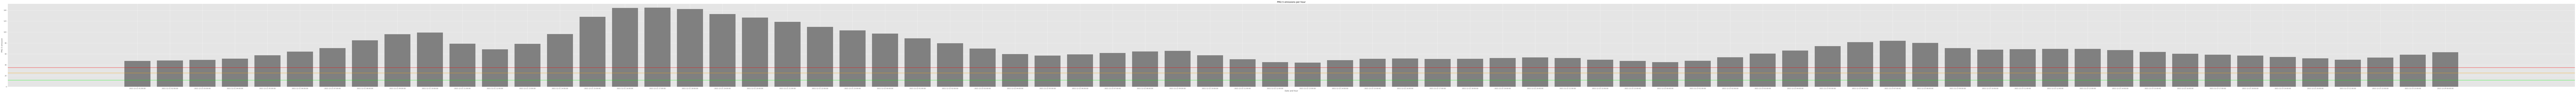

In [5]:
# DOUBLE CLICK ON THE GRAPH TO ZOOM IN #

most_polluted = df_ap_per_date_per_postalcode.idxmax()['pm2.5']
most_polluted_date = most_polluted[0].date() 
most_polluted_areacode = most_polluted[1]

START_DATE =  str(most_polluted_date + timedelta(days=-0))
END_DATE = str(most_polluted_date + timedelta(days=+3))

FIG_HEIGHT = 10
FIG_WIDTH = 300

mask = ((df_ap['date'] > START_DATE) & (df_ap['date'] <= END_DATE) & (df_ap['PC4'] <= most_polluted_areacode))
air_pollution = df_ap_np.loc[mask]

f = plt.figure()
f.set_figheight(FIG_HEIGHT)
f.set_figwidth(FIG_WIDTH)
plt.bar(air_pollution['date'], air_pollution['pm2.5'], color='gray')
plt.title("PM2.5 emissions per hour")
plt.xlabel("Date and hour")
plt.ylabel("PM2.5 emission")

healthy_level = [12]
legal_limit = [25]
unhealthy_level = [35]

plt.axhline(y = healthy_level, color = '#00FF00', linestyle = '-')
plt.axhline(y = legal_limit, color = '#FFA500', linestyle = '-')
plt.axhline(y = unhealthy_level, color = '#FF0000', linestyle = '-')

plt.show()

<h2><font color=slateblue> 5. Data Preparation </font></h2>

<h2><font color=slateblue> 6. Modelling </font></h2>